In [1]:
import pandas as pd
import numpy as np
import scipy 
import sklearn
import pickle
import os
from sklearn.model_selection import train_test_split
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [2]:
# 根据时间进行插值
def data_interpolate(data, data_time):
    # 时间戳转换并转为整型数据便于插值
    time_array = pd.to_datetime(data_time).astype(np.int64)
    output = pd.DataFrame(index=data.index, columns=data.columns)
    for ii in data.columns:
        input = data[ii].to_numpy()
        input_idx = np.where(~np.isnan(input))
        f = interp1d(time_array[input_idx[0]], input[input_idx[0]], kind='linear', fill_value='extrapolate')
        output[ii] = f(time_array)
    return output

In [3]:
CSI_RSRP_COLUMNS = ['PCell1 -Beam CSI-RSRP','PCell2 -Beam CSI-RSRP','PCell3 -Beam CSI-RSRP',
                    'PCell4 -Beam CSI-RSRP','PCell5 -Beam CSI-RSRP','PCell6 -Beam CSI-RSRP','PCell7 -Beam CSI-RSRP','PCell8 -Beam CSI-RSRP']
CSI_RSRQ_COLUMNS = ['PCell1 -Beam CSI-RSRQ','PCell2 -Beam CSI-RSRQ','PCell3 -Beam CSI-RSRQ',
                    'PCell4 -Beam CSI-RSRQ','PCell5 -Beam CSI-RSRQ','PCell6 -Beam CSI-RSRQ','PCell7 -Beam CSI-RSRQ','PCell8 -Beam CSI-RSRQ']
CSI_SINR_COLUMNS = ['PCell1 -Beam CSI-SINR','PCell2 -Beam CSI-SINR','PCell3 -Beam CSI-SINR',
                    'PCell4 -Beam CSI-SINR','PCell5 -Beam CSI-SINR','PCell6 -Beam CSI-SINR','PCell7 -Beam CSI-SINR','PCell8 -Beam CSI-SINR']
CSI_INDEX_COLUMNS = ['PCell1 -Beam CSI-Index','PCell2 -Beam CSI-Index','PCell3 -Beam CSI-Index',
                    'PCell4 -Beam CSI-Index','PCell5 -Beam CSI-Index','PCell6 -Beam CSI-Index','PCell7 -Beam CSI-Index','PCell8 -Beam CSI-Index']
SS_SINR_COLUMNS = ['SSB Index0 SINR','SSB Index1 SINR','SSB Index2 SINR','SSB Index3 SINR','SSB Index4 SINR','SSB Index5 SINR','SSB Index6 SINR']
SS_RSRP_COLUMNS = ['SSB Index0 RSRP','SSB Index1 RSRP','SSB Index2 RSRP','SSB Index3 RSRP','SSB Index4 RSRP','SSB Index5 RSRP','SSB Index6 RSRP']
CSI_SERVING_COL = ['PCell1 -Beam Serving Beam','PCell2 -Beam Serving Beam','PCell3 -Beam Serving Beam','PCell4 -Beam Serving Beam','PCell5 -Beam Serving Beam',
                   'PCell6 -Beam Serving Beam','PCell7 -Beam Serving Beam','PCell8 -Beam Serving Beam']
CSI_RSRP_IDX_COLUNMS = ['CSI-RSRP-Index0', 'CSI-RSRP-Index1', 'CSI-RSRP-Index2', 'CSI-RSRP-Index3', 'CSI-RSRP-Index4', 'CSI-RSRP-Index5','CSI-RSRP-Index6', 'CSI-RSRP-Index7',
                        'CSI-RSRP-Index8', 'CSI-RSRP-Index9', 'CSI-RSRP-Index10', 'CSI-RSRP-Index11', 'CSI-RSRP-Index12','CSI-RSRP-Index13', 'CSI-RSRP-Index14', 'CSI-RSRP-Index15',
                        'CSI-RSRP-Index16', 'CSI-RSRP-Index17', 'CSI-RSRP-Index18', 'CSI-RSRP-Index19','CSI-RSRP-Index20', 'CSI-RSRP-Index21', 'CSI-RSRP-Index22', 'CSI-RSRP-Index23',
                        'CSI-RSRP-Index24', 'CSI-RSRP-Index25', 'CSI-RSRP-Index26', 'CSI-RSRP-Index27', 'CSI-RSRP-Index28', 'CSI-RSRP-Index29', 'CSI-RSRP-Index30', 'CSI-RSRP-Index31']
CSI_SINR_IDX_COLUNMS = ['CSI-SINR-Index0', 'CSI-SINR-Index1', 'CSI-SINR-Index2', 'CSI-SINR-Index3', 'CSI-SINR-Index4', 'CSI-SINR-Index5','CSI-SINR-Index6', 'CSI-SINR-Index7',
                        'CSI-SINR-Index8', 'CSI-SINR-Index9', 'CSI-SINR-Index10', 'CSI-SINR-Index11', 'CSI-SINR-Index12','CSI-SINR-Index13', 'CSI-SINR-Index14', 'CSI-SINR-Index15',
                        'CSI-SINR-Index16', 'CSI-SINR-Index17', 'CSI-SINR-Index18', 'CSI-SINR-Index19','CSI-SINR-Index20', 'CSI-SINR-Index21', 'CSI-SINR-Index22', 'CSI-SINR-Index23',
                        'CSI-SINR-Index24', 'CSI-SINR-Index25', 'CSI-SINR-Index26', 'CSI-SINR-Index27', 'CSI-SINR-Index28', 'CSI-SINR-Index29', 'CSI-SINR-Index30', 'CSI-SINR-Index31']
PERFORMANCE_COLUMNS = ['NR MAC Throughput DL','NR PRB Num DL/s','NR PRB Num DL/slot','NR RI','NR Avg Rank DL/s',
                       'NR DL Total NACK/s','NR DL Total ACK/s','NR PDSCH Initial BLER','NR PDSCH BLER','NR DL Avg MCS']
LOC_COLUMNS = ['Longitude','Latitude']
ALL_COLUMNS = CSI_RSRP_COLUMNS+CSI_RSRQ_COLUMNS+CSI_SINR_COLUMNS+CSI_INDEX_COLUMNS+SS_SINR_COLUMNS+SS_RSRP_COLUMNS+PERFORMANCE_COLUMNS


In [4]:
point_1 =  pd.read_csv('dt_cuhk/0426/csv/方位角240-834-point6_速率300_0426-162459_UE1_0426165537.csv')
point_1 = point_1.dropna(axis=1,how='all')
point_1['SSB Index6 SINR'] = point_1[['SSB Index0 SINR','SSB Index1 SINR','SSB Index2 SINR','SSB Index3 SINR','SSB Index4 SINR','SSB Index5 SINR']].mean(axis=1)
point_1['SSB Index6 RSRP'] = point_1[['SSB Index0 RSRP','SSB Index1 RSRP','SSB Index2 RSRP','SSB Index3 RSRP','SSB Index4 RSRP','SSB Index5 RSRP']].mean(axis=1)
data_set = point_1[['UE Time']+LOC_COLUMNS+ALL_COLUMNS]

d:\Anaconda\envs\tf2\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (172,176,180,184,188,192) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


d:\Anaconda\envs\tf2\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


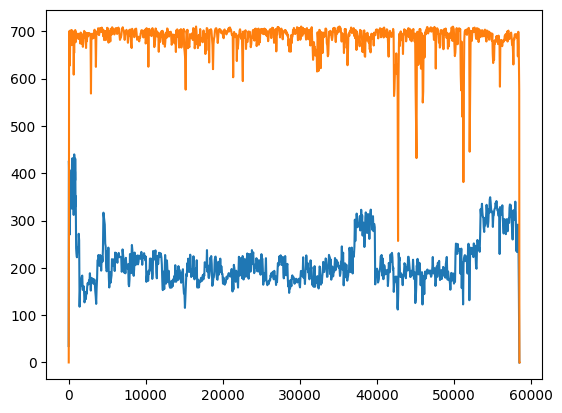

Int64Index([   62,    81,    94,   107,   121,   135,   151,   165,   179,
              194,
            ...
            57949, 58007, 58066, 58125, 58182, 58240, 58297, 58354, 58415,
            58472],
           dtype='int64', length=1033)


In [131]:
data_set.dropna(subset=(LOC_COLUMNS),inplace=True)
data_set.dropna(subset=(ALL_COLUMNS),how='all',inplace=True)
data_set.reset_index(drop=True,inplace=True)
x=data_set[['UE Time','NR MAC Throughput DL']].dropna()
y=data_set[['UE Time','NR PRB Num DL/s']].dropna()
plt.figure()
plt.plot(x.index,x['NR MAC Throughput DL'])
plt.plot(y.index,y['NR PRB Num DL/s']/500)
plt.show()
# index = data_set.loc[data_set['NR MAC Throughput DL']<300].index
# 找到数据异常点
index = data_set.loc[data_set['NR PRB Num DL/s']/500>500].index
print(index)

In [132]:
data_set.iloc[:index[0]]=np.nan 
data_set.iloc[index[-1]+1:]=np.nan
data_set.iloc[42500:42900]=np.nan
data_set.iloc[45000:45250]=np.nan
data_set.iloc[51100:52150]=np.nan

data_set.dropna(subset=(ALL_COLUMNS),how='all',inplace=True)
data_set.reset_index(drop=True,inplace=True)

d:\Anaconda\envs\tf2\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
d:\Anaconda\envs\tf2\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [109]:
data_set_0 = data_set

In [113]:
data_set_1 = data_set

In [119]:
data_set_2 = data_set

In [123]:
data_set_3 = data_set

In [127]:
data_set_4 = data_set

In [133]:
data_set_5 = data_set

In [ ]:
data_set_6 = data_set

In [ ]:
data_set = pd.concat((data_set_0,data_set_1,data_set_2,data_set_3,data_set_4,data_set_5,data_set_6))

In [134]:
data_set = pd.concat((data_set_0,data_set_1,data_set_2,data_set_3,data_set_4,data_set_5))
file_path = 'dt_cuhk/0426/cleaned/834_latlon.csv'
data_set.to_csv(file_path)

In [170]:
file_path = 'dt_cuhk/0426/cleaned/834_latlon.csv'
data_set = pd.read_csv(file_path).iloc[:,1:]
interp_features = PERFORMANCE_COLUMNS+SS_SINR_COLUMNS+SS_RSRP_COLUMNS
data_set[interp_features] = data_interpolate(data_set[interp_features],data_set['UE Time'])
data_set.dropna(subset=(CSI_RSRP_COLUMNS),inplace=True)
data_set.reset_index(drop=True,inplace=True)

d:\Anaconda\envs\tf2\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  after removing the cwd from sys.path.


In [25]:
# 按照index索引排放CSI-RSRP SINR 并记录服务波束idx
def rsrp_by_index(csi_data):
    
    csi_by_idx = pd.DataFrame(np.zeros(shape=[csi_data.shape[0],65]))
    csi_by_idx.columns = CSI_RSRP_IDX_COLUNMS+CSI_SINR_IDX_COLUNMS+['Serving idx']
    
    for i,rows in csi_data.iterrows():
        csi_by_idx.iloc[i]['Serving idx'] = int(rows['PCell1 -Beam CSI-Index'])
        for j in range(8):
            csi_by_idx.iloc[i][int(rows['PCell{} -Beam CSI-Index'.format(j+1)])] = rows['PCell{} -Beam CSI-RSRP'.format(j+1)]
            csi_by_idx.iloc[i][int(rows['PCell{} -Beam CSI-Index'.format(j+1)])+32] = rows['PCell{} -Beam CSI-SINR'.format(j+1)]
    
    return csi_by_idx

In [171]:
csi_features = CSI_RSRP_COLUMNS+CSI_SINR_COLUMNS+CSI_INDEX_COLUMNS
csi_data = data_set[csi_features]
csi_by_idx = rsrp_by_index(csi_data)

In [172]:
# 归一化
RSRP_MAX = -40
RSRP_MIN = -125
RSRQ_MAX = -4
RSRQ_MIN = -30
SE_MAX = 4000
RI_MAX = 4
MCS_MAX = 27
SINR_MAX = 50
SINR_MIN = -20
SE_COLUMNS = ['NR MAC Throughput DL','NR PRB Num DL/s']
csi_by_idx[CSI_RSRP_IDX_COLUNMS] = csi_by_idx[CSI_RSRP_IDX_COLUNMS].replace(0.0,np.nan)
csi_by_idx[CSI_SINR_IDX_COLUNMS] = csi_by_idx[CSI_SINR_IDX_COLUNMS].replace(0.0,np.nan)

In [173]:
data_set_pkl = pd.concat((data_set[LOC_COLUMNS+interp_features+csi_features],csi_by_idx),axis=1)
rsrp_features = CSI_RSRP_IDX_COLUNMS+CSI_RSRP_COLUMNS+SS_RSRP_COLUMNS
sinr_features = CSI_SINR_IDX_COLUNMS+CSI_SINR_COLUMNS+SS_SINR_COLUMNS
mcs_feature = 'NR DL Avg MCS'
bler_feature = 'NR PDSCH BLER'
rank_features = ['NR RI','NR Avg Rank DL/s']
sevring_idx = 'Serving idx'
data_set_pkl[rsrp_features] = (data_set_pkl[rsrp_features]-RSRP_MIN)/(RSRP_MAX-RSRP_MIN)
data_set_pkl[sinr_features] = (data_set_pkl[sinr_features]-SINR_MIN)/(SINR_MAX-SINR_MIN)
data_set_pkl[mcs_feature] = data_set_pkl[mcs_feature]/MCS_MAX
data_set_pkl[rank_features] = data_set_pkl[rank_features]/RI_MAX
data_set_pkl[bler_feature] = data_set_pkl[bler_feature]/100
data_set_pkl[sevring_idx] = data_set_pkl[sevring_idx]/32
data_set_pkl['SE']=data_set_pkl[SE_COLUMNS[0]]/data_set_pkl[SE_COLUMNS[1]]*2**20/SE_MAX
data_set_pkl = data_set_pkl.replace(np.nan,0)

In [174]:
with open('dt_cuhk/0426/data_set/data_834_linear_by_idx_loc.pkl','wb') as f:
    pickle.dump(data_set_pkl,f)
pass